<a href="https://colab.research.google.com/github/bowie0713/Example-/blob/main/bike_example_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [2]:
dataset_cols = ['bike_count','hour','temp','humidity','wind','visibility','dew_pt_temp','radiation','rain','snow','functional']

In [3]:
df = pd.read_csv("SeoulBikeData.csv").drop(['Date','Holiday', 'Seasons'], axis = 1)
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [45]:
df.columns = dataset_cols
df['functional'] = (df['functional'] == 'Yes').astype(int)
df = df[df['hour'] == 12]
df = df.drop(["hour"], axis = 1)
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


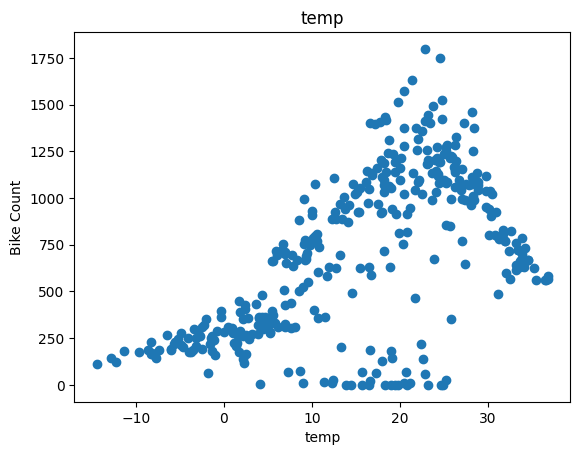

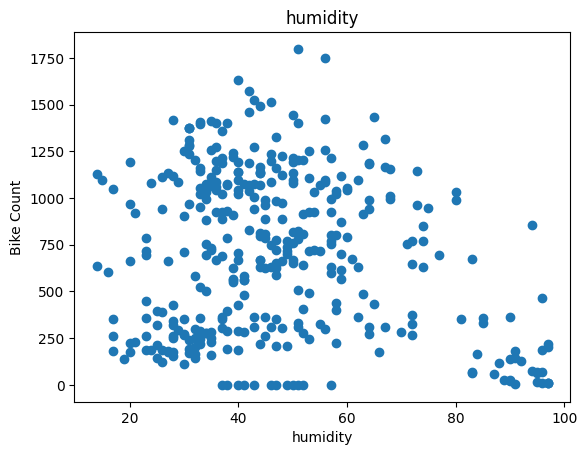

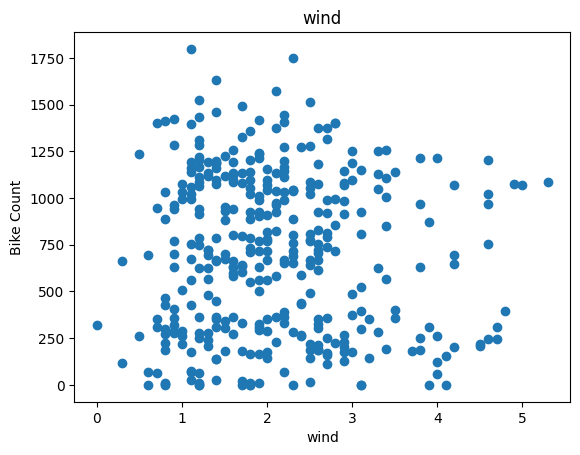

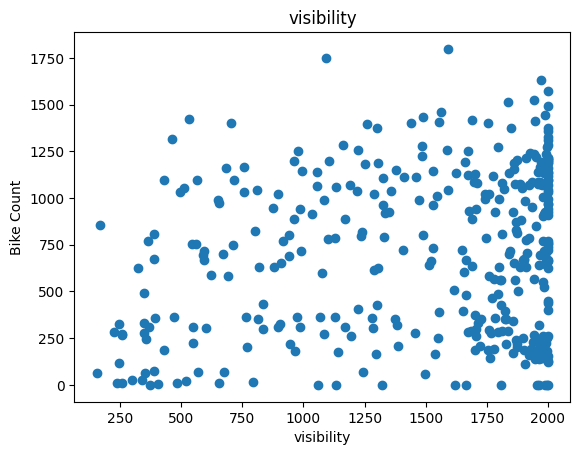

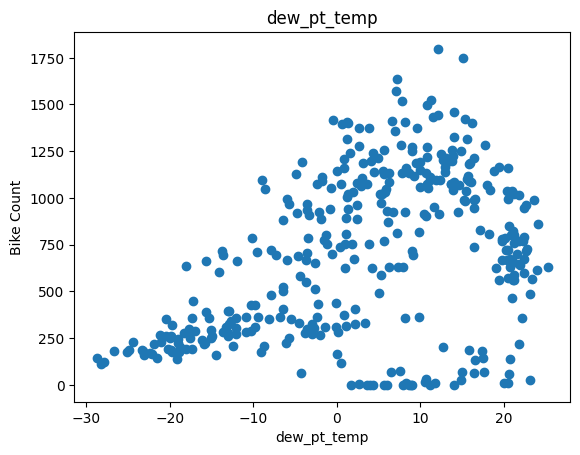

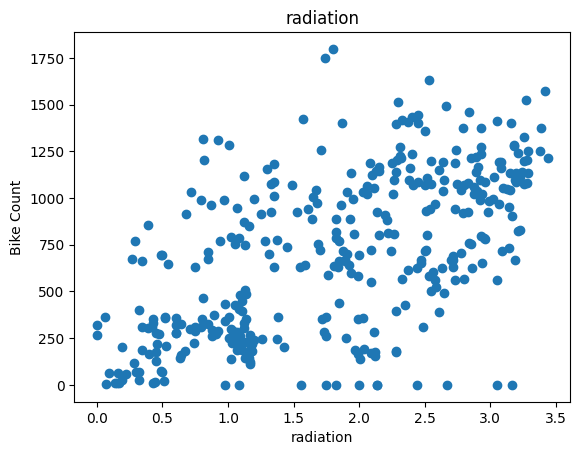

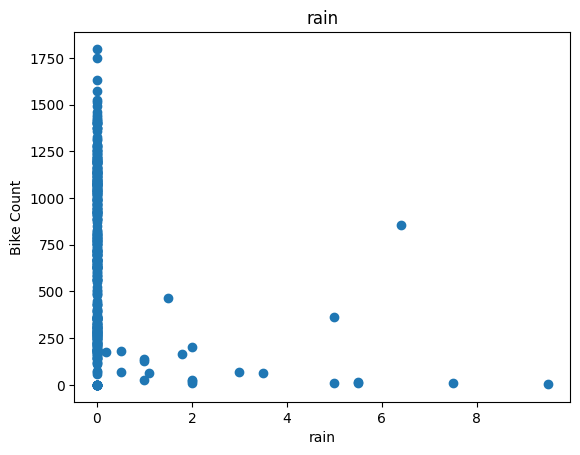

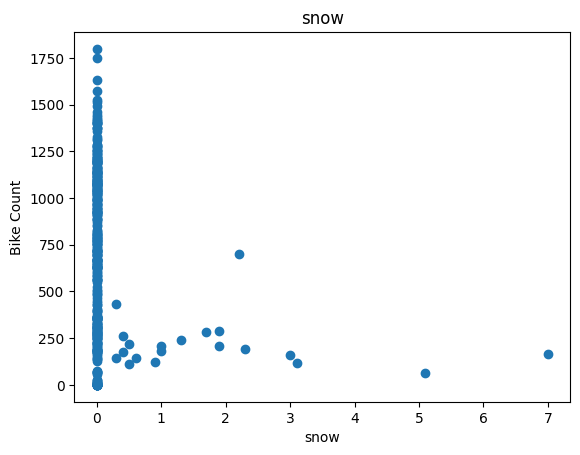

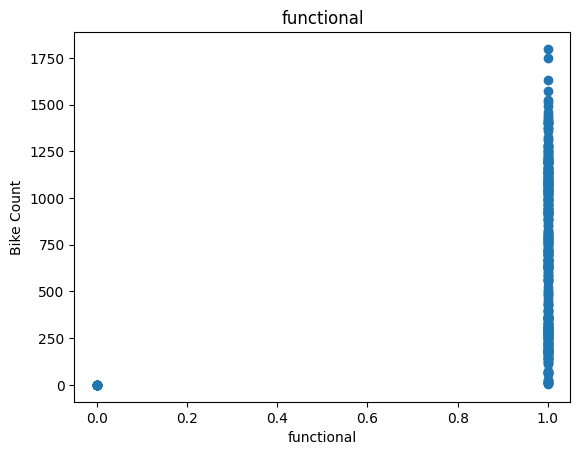

In [46]:
for label in df.columns[1:]:
  plt.scatter(df[label], df['bike_count'])
  plt.title(label)
  plt.ylabel('Bike Count')
  plt.xlabel(label)
  plt.show()

In [47]:
df = df.drop(['wind','visibility','functional'], axis = 1) # drop unnecessary data
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [48]:
train, val, test = np.split(df.sample(frac = 1), [int(0.6 * len(df)), int(0.8 * len(df))]) # train, validation, test datasets

In [49]:
def get_xy(dataframe, y_label, x_labels= None):
  dataframe = copy.deepcopy(dataframe)
  if not x_labels:
    x = dataframe[[c for c in dataframe.columns if c!= y_label]].values
  else:
    if len(x_labels) ==1:
      x = dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      x = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((x,y))

  return data, x, y

In [50]:
_, x_train_temp, y_train_temp = get_xy(train, 'bike_count', x_labels = ["temp"]) # Temp example
_, x_val_temp, y_val_temp = get_xy(val, 'bike_count', x_labels = ["temp"])
_, x_test_temp, y_test_temp = get_xy(test, 'bike_count', x_labels = ["temp"])

# Linear Regression

In [51]:
temp_reg = LinearRegression()
temp_reg.fit(x_train_temp, y_train_temp)

LinearRegression()

In [52]:
print(temp_reg.coef_, temp_reg.intercept_) # gives coefficient and y-intercept

[[21.31167086]] [361.03880611]


In [53]:
temp_reg.score(x_test_temp, y_test_temp)

0.2674467698626516

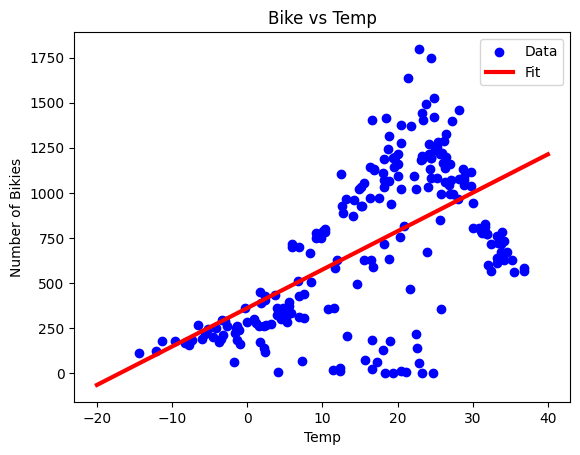

In [54]:
plt.scatter(x_train_temp, y_train_temp, label = 'Data',color = 'blue')
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label = "Fit", color = 'red', linewidth = 3)
plt.legend()
plt.title("Bike vs Temp")
plt.ylabel("Number of Bikies")
plt.xlabel("Temp")
plt.show()

# Multiple Linear Regression

In [1]:
def get_xy(dataframe, y_label, x_labels= None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    x = dataframe[[c for c in dataframe.columns if c!= y_label]].values
  else:
    if len(x_labels) ==1:
      x = dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      x = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((x,y))

  return data, x, y

In [2]:
train, val, test = np.split(df.sample(frac = 1), [int(0.6 * len(df)), int(0.8 * len(df))]) # train, validation, test datasets

NameError: ignored

In [57]:

_, x_train_all, y_train_all = get_xy(train, 'bike_count', x_labels = df.columns[1:]) 
_, x_val_all, y_val_all = get_xy(val, 'bike_count', x_labels = df.columns[1:])
_, x_test_all, y_test_all = get_xy(test, 'bike_count', x_labels = df.columns[1:])

In [58]:
all_reg = LinearRegression()
all_reg.fit(x_train_all, y_train_all)

LinearRegression()

In [59]:
all_reg.score(x_test_all, y_test_all)

0.41784773240386885